In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#!unzip data.zip

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import seaborn as sns
import shutil
import keras
from PIL import Image
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = load_model('encoder.h5')
encoder = Model(inputs=model.input, outputs=model.get_layer('encoder').output)

In [2]:
from glob import glob
trn1='D:/Inv_Data_Imbalance/data/invasive-aquatic-species-data/invasive/*/'
trn2='D:/Inv_Data_Imbalance/data/invasive-aquatic-species-data/noninvasive/*/'
tr1= glob(trn1)
tr2= glob(trn2)

In [5]:
imgs = glob(tr1[9]+'/*')
len(tr2)

3700

In [3]:
tr1= shuffle(tr1)
tr2= shuffle(tr2)

In [4]:
tran_index_inv = np.round( len(tr1)* .6  )
tran_index_noninv = np.round( len(tr2)* .6  )
val_index_inv = np.round( len(tr1)* .8  )
val_index_noninv = np.round( len(tr2)* .8  )


In [5]:
data = []
label = []

for j in tr1[:(int) (tran_index_inv)]:
    label.append(1)
    data.append(j)
    
for j in tr2[:(int) (tran_index_noninv)]:
    label.append(0)
    data.append(j)

from tensorflow.keras.utils import to_categorical
X_train = np.array(data)
Y_train = np.array(label)
X_train,Y_train = shuffle(X_train,Y_train)

In [33]:
#for i in range(len(X_train)):
    #print(X_test[i],Y_test[i])

In [6]:
data = []
label = []

for j in tr1[(int) (tran_index_inv):(int) (val_index_inv)]:
    label.append(1)
    data.append(j)
    
for j in tr2[(int) (tran_index_noninv):(int) (val_index_noninv)]:
    label.append(0)
    data.append(j)

from tensorflow.keras.utils import to_categorical
X_val = np.array(data)
Y_val = np.array(label)
X_val,Y_val = shuffle(X_val,Y_val)

In [ ]:
#for i in range(len(X_train)):
    #print(X_train[i],Y_train[i])

In [7]:

def get_te(k , a) :
    x = glob(k+'/*')
    imgdata=[]
    for i in range(len(x)):
        
        a = Image.open(x[i])
        b = a.resize((40, 40))
        c = np.array(b)
        imgdata.append(c.reshape(40,40,3))
    idata = np.array(imgdata)
    X_train = idata
    X_train = X_train.astype('float32') / 255.
    encoded = encoder.predict(X_train)
    en_sum = sum(encoded) 
    res = np.divide(en_sum,len(x))
    
    return res

def get_cat(k) :
    Y_test = to_categorical(k)
    return Y_test

In [8]:
class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    y_train = get_cat(batch_y)
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x]), np.array( y_train )

In [10]:
batch_size = 32

my_training_batch_generator = My_Custom_Generator(X_train, Y_train, batch_size)
my_validation_batch_generator = My_Custom_Generator(X_val, Y_val, batch_size)

In [ ]:
x = my_training_batch_generator.__getitem__(3)
(x[1])

(20000, 64)

In [153]:
data = []
label = []
breath = []
total = 0

for j in tr1[(int) (val_index_inv) + 1 :]:
    label.append(1)
    a = glob(j+'/*')
    breath.append(len(a))
    total = total + len(a)
    
for j in tr2[ (int)(val_index_noninv) + 1:]:
    label.append(0)
    a = glob(j+'/*')
    breath.append(len(a)) 
    total = total + len(a)

for j in range(0,len(tr1[(int) (val_index_inv) + 1 :])):
    a = glob(tr1[j]+'/*')
    for k in range(0,len(a)):
        data.append(a[k])

for j in range(0,len(tr2[ (int)(val_index_noninv) + 1:])):
    a = glob(tr2[j]+'/*')
    for k in range(0,len(a)):
        data.append(a[k])        
        

imgdata=[]
for i in range(len(data)):
    a = Image.open(data[i])
    b = a.resize((40, 40))
    c = np.array(b)
    imgdata.append(c.reshape(40,40,3))
    
from tensorflow.keras.utils import to_categorical
idata = np.array(imgdata)
X_test = idata
X_test = X_test.astype('float32') / 255.
X_test = np.reshape(X_test, (len(X_test),40,40,3))

encoded = encoder.predict(X_test)

#encoded[5]

In [154]:
end= 0
test_df= []
for i in range(0, len(breath)):
    
    y = end+breath[i]
    en_sum = [sum(x) for x in zip(*encoded[end:y])]
    #len()
    res = [(x/breath[i]) for x in (en_sum)]
    test_df.append(res)
    #print(en_sum)
    #print(res)
    end = end + breath[i]
        
Y_test = to_categorical(label)
test_df = np.array(test_df)
test_df,Y_test = shuffle(test_df,Y_test)
np.shape(test_df)

(873, 64)

In [12]:
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    

    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

In [13]:

model = models.Sequential()
model.add(layers.Dense(32, activation="relu", input_shape=(64,)))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))


In [15]:

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=([get_f1]))

#model.fit(train_df, Y_train, epochs=200, batch_size=32, validation_split = .3, verbose = 1)

model.fit_generator(generator=my_training_batch_generator, epochs = 1,validation_data = my_validation_batch_generator)

82/82 [==============================] - ETA: 0s - loss: 0.3199 - get_f1: 0.8460

KeyboardInterrupt: 

In [155]:
Y_test = Y_test[:1310]
pred = model.predict(test_df)
p = np.round(pred)
f1 = get_f1(Y_test, p)
f1

y_p = []
for i in range(len(p)):
    if ( p[i][0] == 0 ):
        y_p.append(1)
    else :
        y_p.append(0)
y_p = np.array(y_p)
y_t = []
for i in range(len(Y_test)):
    if ( Y_test[i][0] == 0 ):
        y_t.append(1)
    else :
        y_t.append(0)
y_t = np.array(y_t)

from sklearn.metrics import confusion_matrix
a=(confusion_matrix(y_t, y_p , labels=[0,1]))
a

ValueError: operands could not be broadcast together with shapes (850,2) (873,2) 

In [29]:
len(label)

873

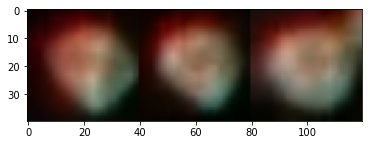

0

<tf.Tensor: shape=(), dtype=float32, numpy=0.9315706>

0.9315706080411963

In [124]:
List= [ [5,10.5,15,20.5,25], [1,1,1,1,1] ]

List = sum(List)
List

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [125]:
encoded

NameError: name 'encoded' is not defined

0.829075064369182

<tf.Tensor: shape=(), dtype=float32, numpy=3.1974423e-14>